In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/causes-of-death-our-world-in-data/20222703 Causes Of Death Clean Output V2.0.csv
/kaggle/input/causes-of-death-our-world-in-data/20220327 annual-number-of-deaths-by-cause.csv


In [2]:
data_path       = "../input/causes-of-death-our-world-in-data/20220327 annual-number-of-deaths-by-cause.csv"
data_path_clean = "../input/causes-of-death-our-world-in-data/20222703 Causes Of Death Clean Output V2.0.csv"
dataset         = pd.read_csv(data_path)
dataset_clean   = pd.read_csv(data_path_clean)

In [3]:
CA_dataset = dataset.loc[dataset['Entity'] == 'Canada']
CA_dataset.to_csv("Death_Rates_Canada.csv")
CA_dataset = CA_dataset.reset_index(drop=True)
CA_dataset.rename(columns={'Year': 'Date'}, inplace = True)
CA_dataset.drop(['Entity','Code'], axis=1, inplace = True)
CA_dataset.fillna(0, inplace=True)

In [4]:
CA_dataset['Total_Deaths'] = CA_dataset.iloc[:, 4:37].sum(axis=1)

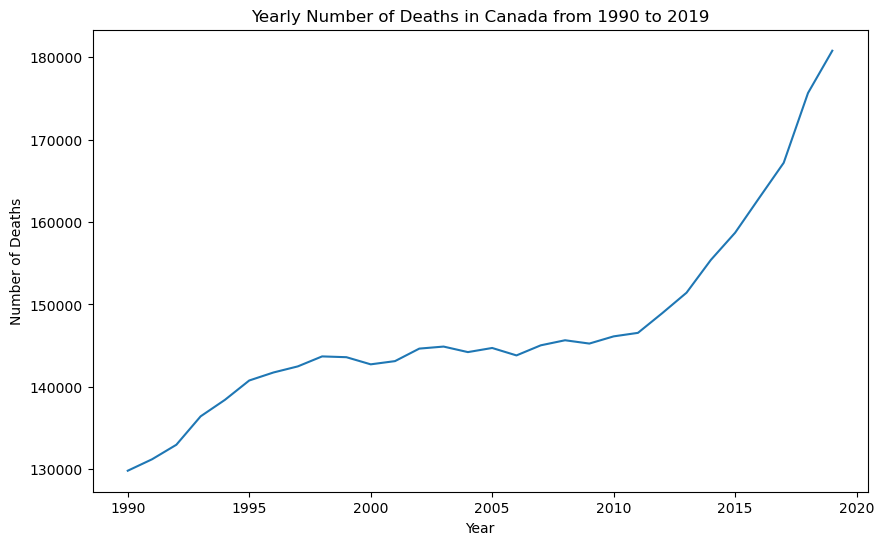

In [5]:
plt.figure(figsize=(10,6))
plt.title("Yearly Number of Deaths in Canada from 1990 to 2019")
plt.ylabel("Number of Deaths")
plt.xlabel("Year")
sns.lineplot(x=CA_dataset['Date'], y = CA_dataset['Total_Deaths'])
plt.show()

In [6]:
CA_datasetCleaned = dataset_clean.loc[dataset_clean['Entity'] == 'Canada'].copy()
CA_datasetCleaned.fillna(0, inplace=True)
DSum = CA_datasetCleaned.groupby(['Causes name']).sum()
DSum.drop('Year', axis=1, inplace=True)
DSum.reset_index(inplace=True)
DSum.sort_values(by=['Death Numbers'], ascending=False, inplace=True)

/tmp/ipykernel_20/202169052.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DSum = CA_datasetCleaned.groupby(['Causes name']).sum()


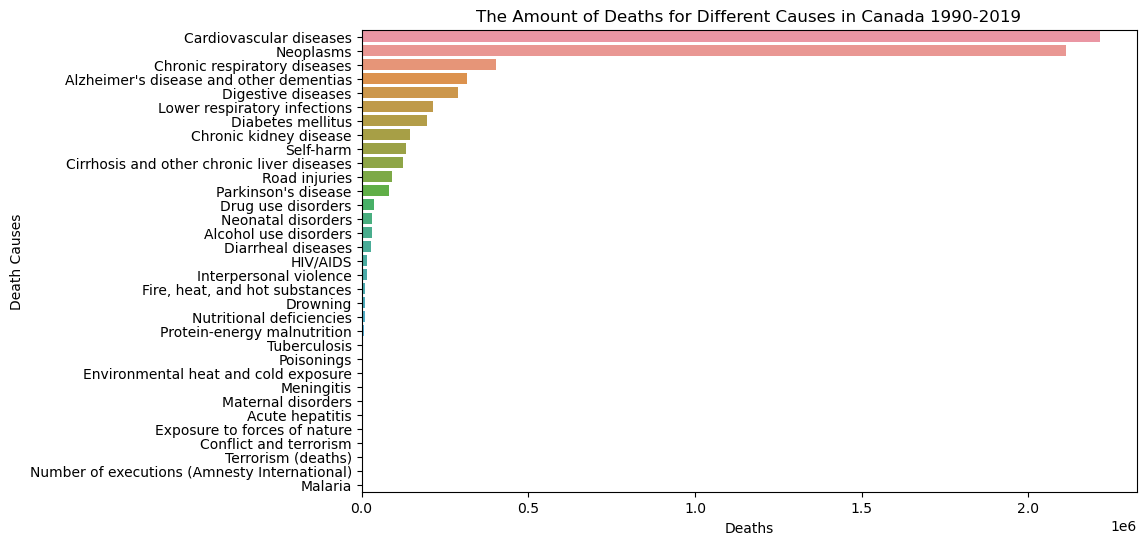

In [7]:
plt.figure(figsize=(10,6))
plt.title('The Amount of Deaths for Different Causes in Canada 1990-2019')
sns.barplot(y='Causes name', x='Death Numbers', data=DSum)
plt.ylabel('Death Causes')
plt.xlabel('Deaths')
plt.show()

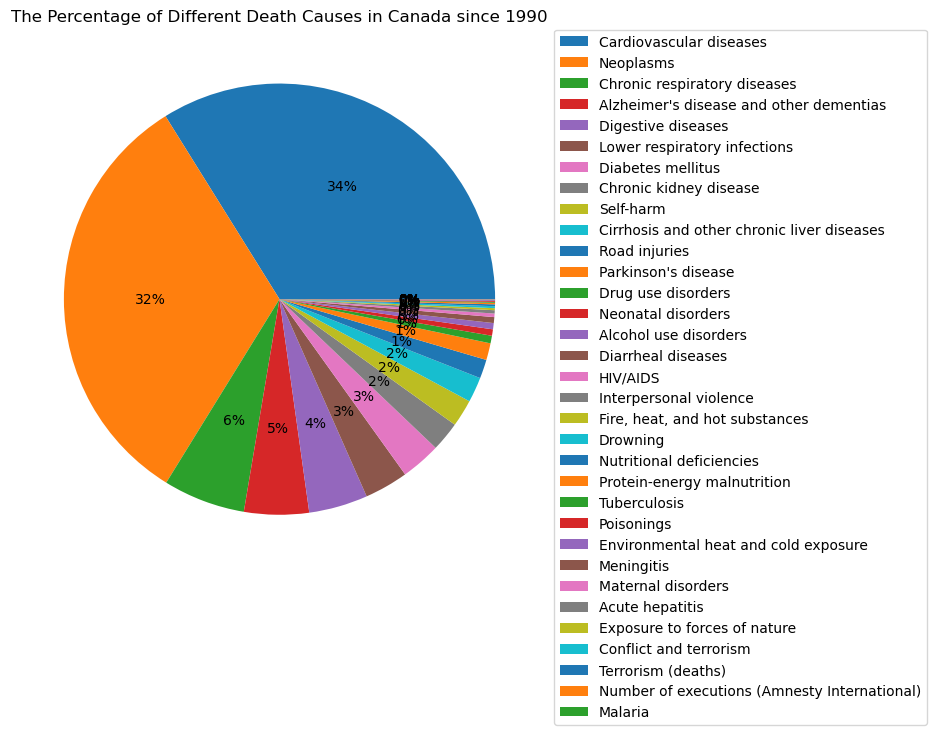

In [8]:
figPie = plt.figure(figsize=(7,7))
figPie.patch.set_facecolor('white')
plt.title("The Percentage of Different Death Causes in Canada since 1990")
plt.pie(DSum['Death Numbers'], autopct = '%0.0f%%')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, labels=DSum['Causes name'])
plt.show()

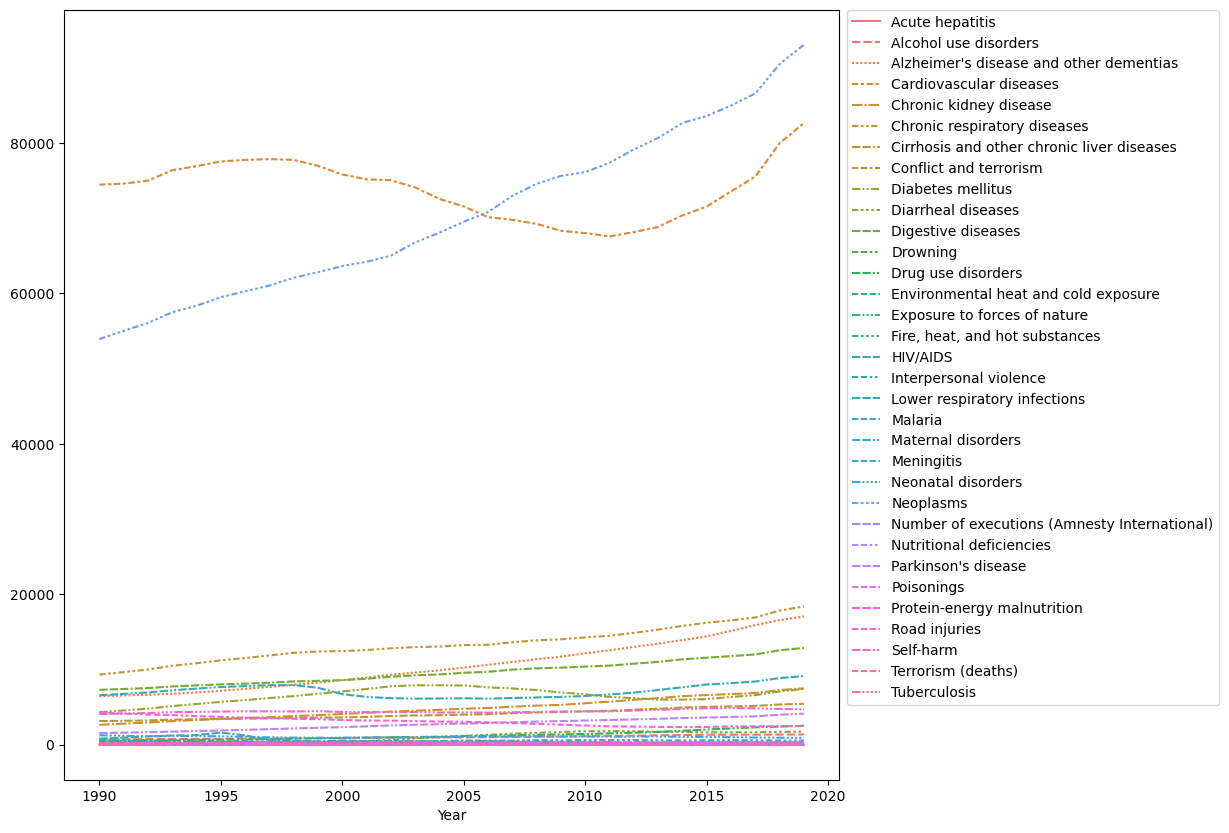

In [9]:
CA_datasetCleaned.reset_index(drop=True, inplace=True)
CA_datasetCleaned.drop(['Causes Full Description','Entity', 'Code'], axis=1, inplace=True)
plt.figure(figsize=(10,10))
sns.lineplot(data=pd.pivot_table(CA_datasetCleaned, values='Death Numbers', columns='Causes name', index='Year'))
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.show()